In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import statistics as stat
from scipy import stats

## Non-reversal Walk

In [204]:
def non_rev_walk2d(n,plot=True): 
    # n = number of steps
    init_x = 0
    init_y = 0
    step_len = 1
    x = init_x
    y = init_y
    prev = -1
    for i in range(n):
        x1 = x
        y1 = y
        dir = random.randint(0,3)
        
        #For non-reversal
        while((dir==1 and prev==0) or (dir==0 and prev==1) or (dir==2 and prev==3) or (dir==3 and prev==2)):
            dir = random.randint(0,3)
        prev = dir
        
        if(dir==0):
            x+=step_len
        elif(dir==1):
            x-=step_len
        elif(dir==2):
            y+=step_len
        else:
            y-=step_len
        x2 = x
        y2 = y
        if(plot):
            plt.plot([x1,x2],[y1,y2], color = 'blue')
    return x,y

(-6, -10)

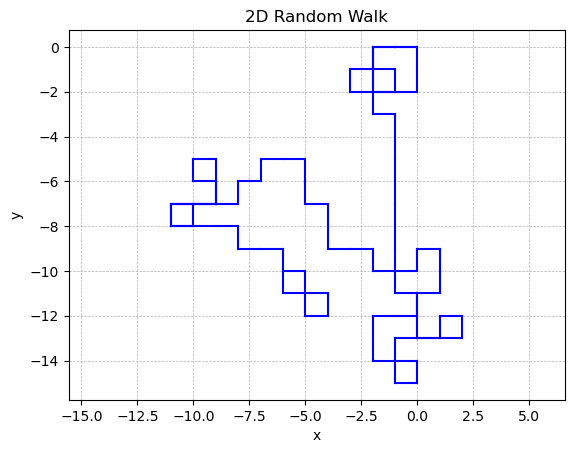

In [205]:
plt.grid(True, linestyle='--', linewidth=0.5)
plt.axis('Equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Random Walk')
walk2d(100)

Text(0.5, 1.0, '2D Random Walk')

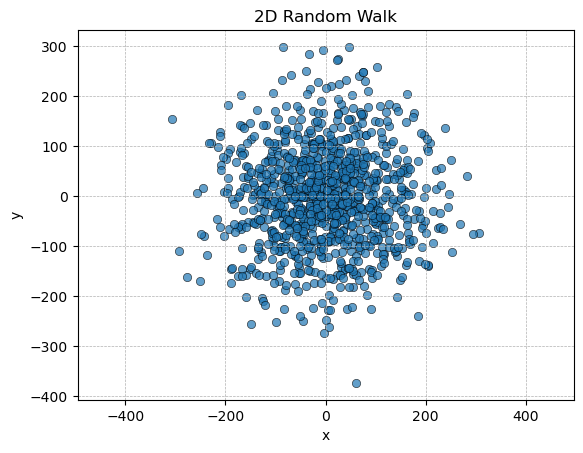

In [207]:
walkers = 1000
walker_x=[]
walker_y=[]
for i in range(walkers):
    x,y=non_rev_walk2d(10000,plot=False)
    walker_x.append(x)
    walker_y.append(y)
plt.scatter(walker_x, walker_y, alpha=0.7,edgecolor='black',linewidths=0.5)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.axis('Equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Random Walk')

### Multiple walkers

In [209]:
def many_non_rev2d(steps, walkers):
    # steps = number of steps
    # walkers = number of walkers
    walker_x = np.zeros(walkers)
    walker_y = np.zeros(walkers)
    for i in range(walkers):
        x, y = non_rev_walk2d(steps, plot=False)
        walker_x[i] = x
        walker_y[i] = y

    return walker_x, walker_y

In [211]:
steps = np.arange(1000, 10000, 100)
walkers = 1000
d_sq=[]
for step in steps:
    x, y = many_non_rev2d(step, walkers)
    d_sq.append(stat.mean(x**2 + y**2))

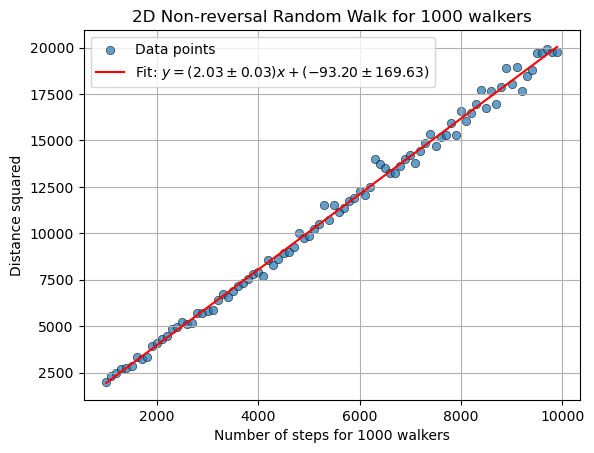

Slope (m): 2.0331 ± 0.0281 (95% CI)
Intercept (b): -93.1982 ± 169.6260 (95% CI)
Standard Error of the Estimate (SEE): 348.4327


In [213]:
# Perform linear regression (y = mx + b)
coefficients, cov_matrix = np.polyfit(steps, d_sq, 1, cov=True)  # Enable covariance matrix
m, b = coefficients  # m = slope, b = intercept

# Calculate standard errors for slope (m) and intercept (b)
n = len(steps)  # Number of data points
se_m = np.sqrt(cov_matrix[0, 0])  # Standard error of slope
se_b = np.sqrt(cov_matrix[1, 1])  # Standard error of intercept

# Generate fitted line
y_fit = m * steps + b

# Calculate R-squared (goodness of fit)
residuals = d_sq - y_fit
ss_res = np.sum(residuals**2)
#ss_tot = np.sum((d_sq_mean - np.mean(d_sq_mean))**2)
#r_squared = 1 - (ss_res / ss_tot)

# Calculate Standard Error of the Estimate (SEE)
dof = n - 2  # Degrees of freedom (for linear regression)
see = np.sqrt(ss_res / dof)

# Calculate 95% confidence intervals for slope and intercept
t_value = stats.t.ppf(0.975, dof)  # Two-tailed t-statistic for 95% CI
m_ci = t_value * se_m  # Margin of error for slope
b_ci = t_value * se_b  # Margin of error for intercept

# Plot the data and the fitted line
plt.scatter(steps, d_sq, alpha=0.7, edgecolor='black', linewidths=0.5, label='Data points')
plt.xlabel("Number of steps for 1000 walkers")
plt.ylabel("Distance squared") 
plt.title("2D Non-reversal Random Walk for 1000 walkers") 

# Plot the regression line with equation and uncertainty
plt.plot(steps, y_fit, color='red', 
         label=f'Fit: $y = ({m:.2f} \pm {m_ci:.2f})x + ({b:.2f} \pm {b_ci:.2f})$')

# Add uncertainty bands (95% confidence interval for the mean prediction)
#ci = t_value * see * np.sqrt(1/n + (steps - np.mean(steps))**2 / np.sum((steps - np.mean(steps))**2))
#plt.fill_between(steps, y_fit - ci, y_fit + ci, color='red', alpha=0.2, label='95% Confidence Band')

plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Slope (m): {m:.4f} ± {m_ci:.4f} (95% CI)")
print(f"Intercept (b): {b:.4f} ± {b_ci:.4f} (95% CI)")
print(f"Standard Error of the Estimate (SEE): {see:.4f}")

# 3D Random Walk

In [214]:
def non_rev_walk3d(n): 
    # n = number of steps
    init_x = 0
    init_y = 0
    init_z = 0
    step_len = 1
    x = init_x
    y = init_y
    z = init_z
    prev = -1
    for i in range(n):
        x1 = x
        y1 = y
        z1 = z
        dir = random.randint(0,5)
        
        #For non-reversal
        while((dir==1 and prev==0) or (dir==0 and prev==1) or (dir==2 and prev==3) or (dir==3 and prev==2) or (dir==4 and prev==5) or (dir==5 and prev==4)):
            dir = random.randint(0,5)
        prev = dir
        
        if(dir==0):
            x+=step_len
        elif(dir==1):
            x-=step_len
        elif(dir==2):
            y+=step_len
        elif(dir==3):
            y-=step_len
        elif(dir==4):
            z+=step_len
        else:
            z-=step_len
        x2 = x
        y2 = y
        z2 = z
    return x,y,z

def many_non_rev3d(steps, walkers):
    # steps = number of steps
    # walkers = number of walkers
    walker_x = np.zeros(walkers)
    walker_y = np.zeros(walkers)
    walker_z = np.zeros(walkers)
    for i in range(walkers):
        x, y, z = non_rev_walk3d(steps)
        walker_x[i] = x
        walker_y[i] = y
        walker_z[i] = z

    return walker_x, walker_y, walker_z

In [215]:
steps = np.arange(1000, 10000, 100)
walkers = 1000
d_sq=[]
for step in steps:
    x, y, z = many_non_rev3d(step, walkers)
    d_sq.append(stat.mean(x**2 + y**2 + z**2))

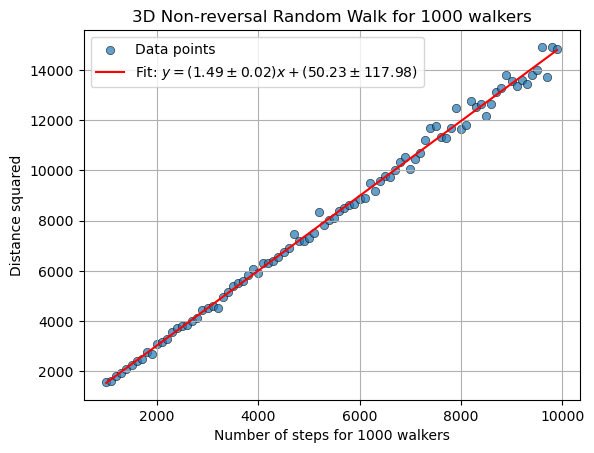

Slope (m): 1.4887 ± 0.0195 (95% CI)
Intercept (b): 50.2297 ± 117.9754 (95% CI)
Standard Error of the Estimate (SEE): 242.3361


In [216]:
# Perform linear regression (y = mx + b)
coefficients, cov_matrix = np.polyfit(steps, d_sq, 1, cov=True)  # Enable covariance matrix
m, b = coefficients  # m = slope, b = intercept

# Calculate standard errors for slope (m) and intercept (b)
n = len(steps)  # Number of data points
se_m = np.sqrt(cov_matrix[0, 0])  # Standard error of slope
se_b = np.sqrt(cov_matrix[1, 1])  # Standard error of intercept

# Generate fitted line
y_fit = m * steps + b

# Calculate R-squared (goodness of fit)
residuals = d_sq - y_fit
ss_res = np.sum(residuals**2)
#ss_tot = np.sum((d_sq_mean - np.mean(d_sq_mean))**2)
#r_squared = 1 - (ss_res / ss_tot)

# Calculate Standard Error of the Estimate (SEE)
dof = n - 2  # Degrees of freedom (for linear regression)
see = np.sqrt(ss_res / dof)

# Calculate 95% confidence intervals for slope and intercept
t_value = stats.t.ppf(0.975, dof)  # Two-tailed t-statistic for 95% CI
m_ci = t_value * se_m  # Margin of error for slope
b_ci = t_value * se_b  # Margin of error for intercept

# Plot the data and the fitted line
plt.scatter(steps, d_sq, alpha=0.7, edgecolor='black', linewidths=0.5, label='Data points')
plt.xlabel("Number of steps for 1000 walkers")
plt.ylabel("Distance squared") 
plt.title("3D Non-reversal Random Walk for 1000 walkers") 

# Plot the regression line with equation and uncertainty
plt.plot(steps, y_fit, color='red', 
         label=f'Fit: $y = ({m:.2f} \pm {m_ci:.2f})x + ({b:.2f} \pm {b_ci:.2f})$')

plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Slope (m): {m:.4f} ± {m_ci:.4f} (95% CI)")
print(f"Intercept (b): {b:.4f} ± {b_ci:.4f} (95% CI)")
print(f"Standard Error of the Estimate (SEE): {see:.4f}")

### Efficient Code for 2D

In [ ]:
def non_rev_2d(steps, walkers):
    # steps = number of steps
    # walkers = number of walkers
    x_walkers=[np.zeros(walkers)]
    y_walkers=[np.zeros(walkers)]
    d_sq=[]
    step_len = 100
    prev = np.ones(walkers)*-1

    for i in range(steps):
        x = x_walkers[i]
        y = y_walkers[i]
        for j in range(walkers):
            dir = random.randint(0,3)
            
            #For non-reversal
            while((dir==1 and prev[j]==0) or (dir==0 and prev[j]==1) or (dir==2 and prev[j]==3) or (dir==3 and prev[j]==2)):
                dir = random.randint(0,3)
            prev[j] = dir
            
            if(dir==0):
                x[j]+=1
            elif(dir==1):
                x[j]-=1
            elif(dir==2):
                y[j]+=1
            else:
                y[j]-=1

        x_walkers.append(x)
        y_walkers.append(y)
        d_sq.append(stat.mean(x**2 + y**2))    
    return d_sq        
        

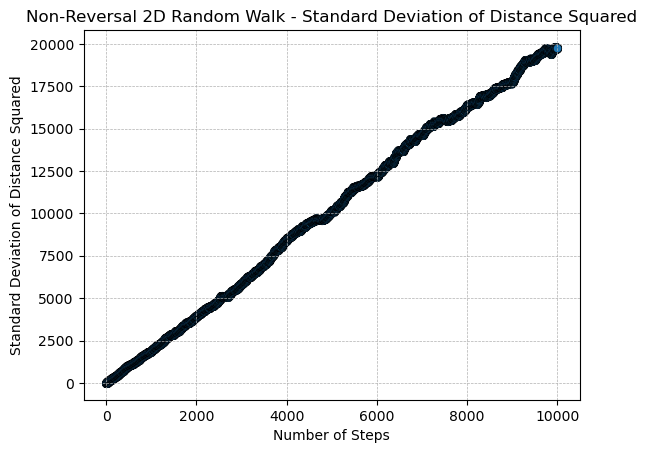

In [170]:
d=non_rev_2d(10000, 1000)
plt.scatter(np.arange(len(d)), d, alpha=0.7, edgecolor='black', linewidths=0.5)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Number of Steps')
plt.ylabel('Standard Deviation of Distance Squared')
plt.title('Non-Reversal 2D Random Walk - Standard Deviation of Distance Squared')
plt.show()

### Efficient Code in 3D

In [171]:
def non_rev_3d(steps, walkers):
    # steps = number of steps
    # walkers = number of walkers
    x_walkers=[np.zeros(walkers)]
    y_walkers=[np.zeros(walkers)]
    z_walkers=[np.zeros(walkers)]
    d_sq_stdev=[]
    #step_len = 100
    prev = np.ones(walkers)*-1

    for i in range(steps):
        x = x_walkers[i]
        y = y_walkers[i]
        z = z_walkers[i]
        for j in range(walkers):
            dir = random.randint(0,5)
            
            #For non-reversal
            while((dir==1 and prev[j]==0) or (dir==0 and prev[j]==1) or (dir==2 and prev[j]==3) or (dir==3 and prev[j]==2) or (dir==4 and prev[j]==5) or (dir==5 and prev[j]==4)):
                dir = random.randint(0,5)
            prev[j] = dir
            
            if(dir==0):
                x[j]+=1
            elif(dir==1):
                x[j]-=1
            elif(dir==2):
                y[j]+=1
            elif(dir==3):
                y[j]-=1
            elif(dir==4):
                z[j]+=1
            else:
                z[j]-=1

        x_walkers.append(x)
        y_walkers.append(y)
        z_walkers.append(z)
        d_sq_stdev.append(stat.stdev(x**2 + y**2 + z**2))
    
    return x_walkers, y_walkers, z_walkers, d_sq_stdev        

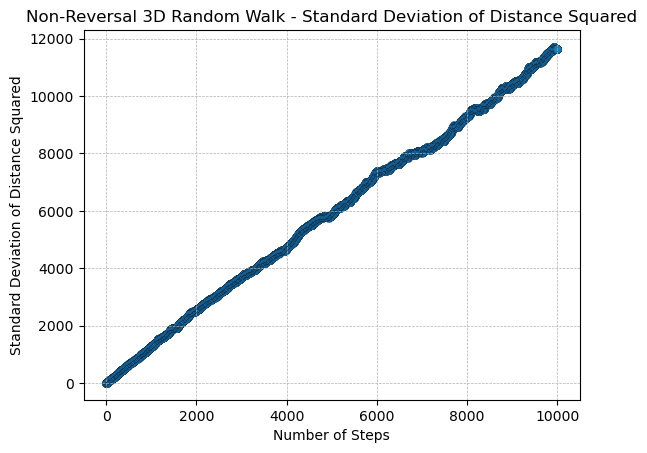

In [176]:
x,y,z,d=non_rev_3d(10000, 1000)
plt.scatter(np.arange(len(d)), d, alpha=0.7, edgecolor='black', linewidths=0.1)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Number of Steps')
plt.ylabel('Standard Deviation of Distance Squared')
plt.title('Non-Reversal 3D Random Walk - Standard Deviation of Distance Squared')
plt.show()

### 4D

In [173]:
def non_rev_4d(steps, walkers):
    # steps = number of steps
    # walkers = number of walkers
    x_walkers=[np.zeros(walkers)]
    y_walkers=[np.zeros(walkers)]
    z_walkers=[np.zeros(walkers)]
    t_walkers=[np.zeros(walkers)]
    d_sq_stdev=[]
    #step_len = 100
    prev = np.ones(walkers)*-1

    for i in range(steps):
        x = x_walkers[i]
        y = y_walkers[i]
        z = z_walkers[i]
        t = t_walkers[i]
        for j in range(walkers):
            dir = random.randint(0,7)
            
            #For non-reversal
            while((dir==1 and prev[j]==0) or (dir==0 and prev[j]==1) or (dir==2 and prev[j]==3) or (dir==3 and prev[j]==2) or (dir==4 and prev[j]==5) or (dir==5 and prev[j]==4) or (dir==6 and prev[j]==7) or (dir==7 and prev[j]==6)):
                dir = random.randint(0,7)
            prev[j] = dir
            
            if(dir==0):
                x[j]+=1
            elif(dir==1):
                x[j]-=1
            elif(dir==2):
                y[j]+=1
            elif(dir==3):
                y[j]-=1
            elif(dir==4):
                z[j]+=1
            elif(dir==5):
                z[j]-=1
            elif(dir==6):
                t[j]+=1
            else:
                t[j]-=1

        x_walkers.append(x)
        y_walkers.append(y)
        z_walkers.append(z)
        t_walkers.append(t)
        d_sq_stdev.append(stat.stdev(x**2 + y**2 + z**2 + t**2))
    
    return d_sq_stdev        

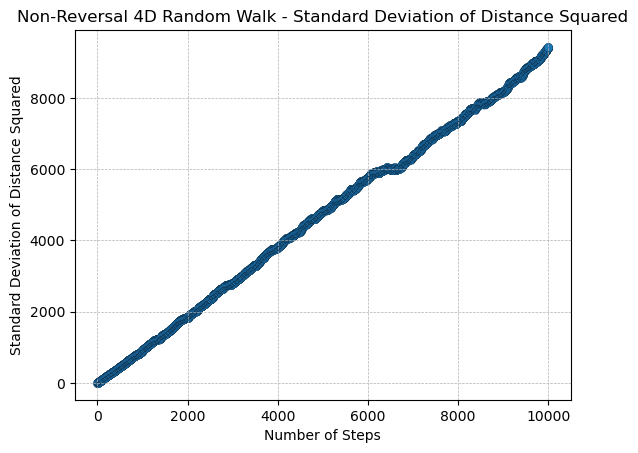

In [177]:
d=non_rev_4d(10000, 1000)
plt.scatter(np.arange(len(d)), d, alpha=0.5, edgecolor='black', linewidths=0.1)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Number of Steps')
plt.ylabel('Standard Deviation of Distance Squared')
plt.title('Non-Reversal 4D Random Walk - Standard Deviation of Distance Squared')
plt.show()

### 5D

In [180]:
def non_rev_5d(steps, walkers):
    # steps = number of steps
    # walkers = number of walkers
    x_walkers=[np.zeros(walkers)]
    y_walkers=[np.zeros(walkers)]
    z_walkers=[np.zeros(walkers)]
    u_walkers=[np.zeros(walkers)]
    v_walkers=[np.zeros(walkers)]
    d_sq_stdev=[]
    #step_len = 100
    prev = np.ones(walkers)*-1

    for i in range(steps):
        x = x_walkers[i]
        y = y_walkers[i]
        z = z_walkers[i]
        u = u_walkers[i]
        v = v_walkers[i]
        for j in range(walkers):
            dir = random.randint(0,9)
            
            #For non-reversal
            while((dir==1 and prev[j]==0) or (dir==0 and prev[j]==1) or (dir==2 and prev[j]==3) or (dir==3 and prev[j]==2) or (dir==4 and prev[j]==5) or (dir==5 and prev[j]==4) or (dir==6 and prev[j]==7) or (dir==7 and prev[j]==6) or (dir==8 and prev[j]==9) or (dir==9 and prev[j]==8)):
                dir = random.randint(0,9)
            prev[j] = dir
            
            if(dir==0):
                x[j]+=1
            elif(dir==1):
                x[j]-=1
            elif(dir==2):
                y[j]+=1
            elif(dir==3):
                y[j]-=1
            elif(dir==4):
                z[j]+=1
            elif(dir==5):
                z[j]-=1
            elif(dir==6):
                u[j]+=1
            elif(dir==7):
                u[j]-=1
            elif(dir==8):
                v[j]+=1
            else:
                v[j]-=1

        x_walkers.append(x)
        y_walkers.append(y)
        z_walkers.append(z)
        u_walkers.append(u)
        v_walkers.append(v)
        d_sq_stdev.append(stat.stdev(x**2 + y**2 + z**2 + u**2 + v**2))
    
    return d_sq_stdev        

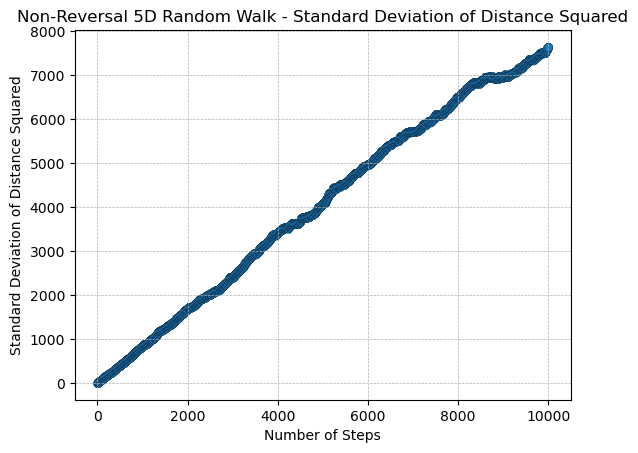

In [181]:
d=non_rev_5d(10000, 1000)
plt.scatter(np.arange(len(d)), d, alpha=0.5, edgecolor='black', linewidths=0.1)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Number of Steps')
plt.ylabel('Standard Deviation of Distance Squared')
plt.title('Non-Reversal 5D Random Walk - Standard Deviation of Distance Squared')
plt.show()

### 6D

In [182]:
def non_rev_6d(steps, walkers):
    # steps = number of steps
    # walkers = number of walkers
    x_walkers=[np.zeros(walkers)]
    y_walkers=[np.zeros(walkers)]
    z_walkers=[np.zeros(walkers)]
    u_walkers=[np.zeros(walkers)]
    v_walkers=[np.zeros(walkers)]
    w_walkers=[np.zeros(walkers)]
    d_sq_stdev=[]
    #step_len = 100
    prev = np.ones(walkers)*-1

    for i in range(steps):
        x = x_walkers[i]
        y = y_walkers[i]
        z = z_walkers[i]
        u = u_walkers[i]
        v = v_walkers[i]
        w = w_walkers[i]
        for j in range(walkers):
            dir = random.randint(0,11)
            
            #For non-reversal
            while((dir==1 and prev[j]==0) or (dir==0 and prev[j]==1) or (dir==2 and prev[j]==3) or (dir==3 and prev[j]==2) or 
                  (dir==4 and prev[j]==5) or (dir==5 and prev[j]==4) or (dir==6 and prev[j]==7) or (dir==7 and prev[j]==6) or 
                  (dir==8 and prev[j]==9) or (dir==9 and prev[j]==8) or (dir==10 and prev[j]==11) or (dir==11 and prev[j]==10)):
                dir = random.randint(0,11)
            prev[j] = dir
            
            if(dir==0):
                x[j]+=1
            elif(dir==1):
                x[j]-=1
            elif(dir==2):
                y[j]+=1
            elif(dir==3):
                y[j]-=1
            elif(dir==4):
                z[j]+=1
            elif(dir==5):
                z[j]-=1
            elif(dir==6):
                u[j]+=1
            elif(dir==7):
                u[j]-=1
            elif(dir==8):
                v[j]+=1
            elif(dir==9):
                v[j]-=1
            elif(dir==10):
                w[j]+=1
            else:
                w[j]-=1

        x_walkers.append(x)
        y_walkers.append(y)
        z_walkers.append(z)
        u_walkers.append(u)
        v_walkers.append(v)
        w_walkers.append(w)
        d_sq_stdev.append(stat.stdev(x**2 + y**2 + z**2 + u**2 + v**2 + w**2))
    
    return d_sq_stdev        

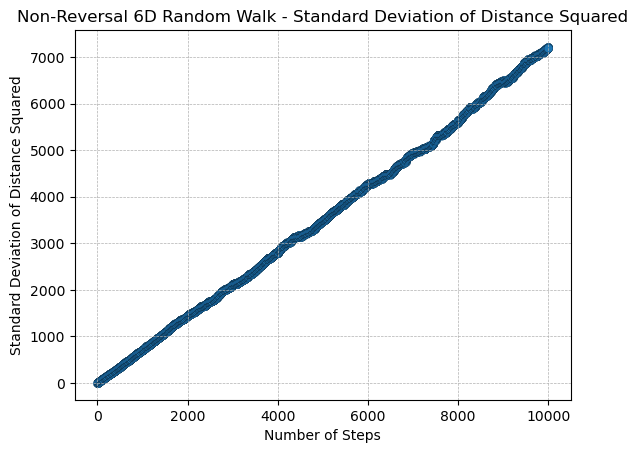

In [183]:
d=non_rev_6d(10000, 1000)
plt.scatter(np.arange(len(d)), d, alpha=0.5, edgecolor='black', linewidths=0.1)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Number of Steps')
plt.ylabel('Standard Deviation of Distance Squared')
plt.title('Non-Reversal 6D Random Walk - Standard Deviation of Distance Squared')
plt.show()

## Self-avoiding walk

In [184]:
def selfavoidingwalk2d(n, plot=True):
    coord = [(0, 0)]
    step_len = 1

    for i in range(n):
        x1, y1 = coord[-1]
        
        # Check all possible directions
        possible_dirs = []
        if (x1 + step_len, y1) not in coord:  # right
            possible_dirs.append(0)
        if (x1 - step_len, y1) not in coord:  # left
            possible_dirs.append(1)
        if (x1, y1 + step_len) not in coord:  # up
            possible_dirs.append(2)
        if (x1, y1 - step_len) not in coord:  # down
            possible_dirs.append(3)
        
        # If no possible directions, break
        if not possible_dirs:
            break
            
        # Randomly choose from available directions
        dir = random.choice(possible_dirs)
        
        # Calculate new position
        if dir == 0:
            x2, y2 = x1 + step_len, y1
        elif dir == 1:
            x2, y2 = x1 - step_len, y1
        elif dir == 2:
            x2, y2 = x1, y1 + step_len
        else:
            x2, y2 = x1, y1 - step_len
            
        coord.append((x2, y2))

        if plot:
            plt.plot([x1, x2], [y1, y2], color='blue')
            plt.grid(True, linestyle='--', linewidth=0.5)
            plt.axis('equal')  
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title('2D Self-Avoiding Random Walk')
    
    if plot:
        plt.scatter(0, 0, color='red', s=20, label='Starting Point')  # Mark origin
        plt.scatter(coord[-1][0], coord[-1][1], color='green', s=20, label=f'Ending Point\nNumber of Step={len(coord)}') #end point
        plt.legend()
        plt.show()
    
    return len(coord), coord[-1][0], coord[-1][1]

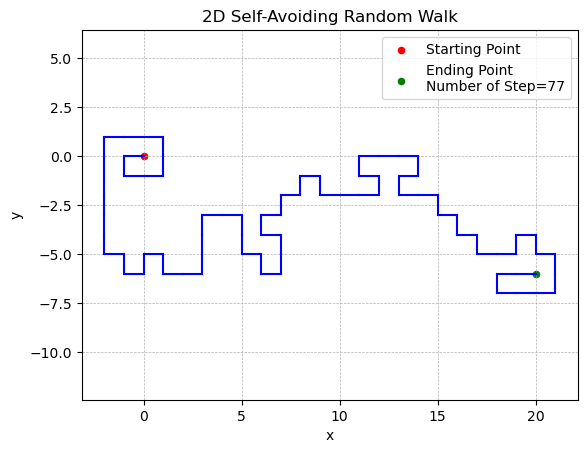

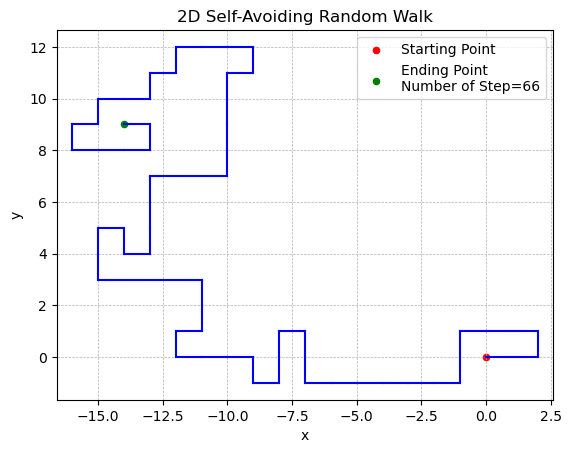

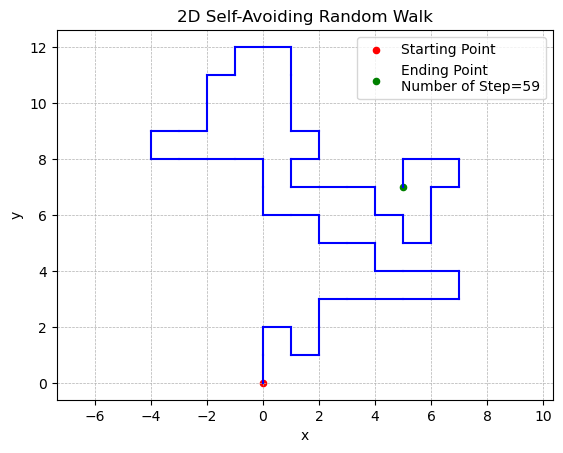

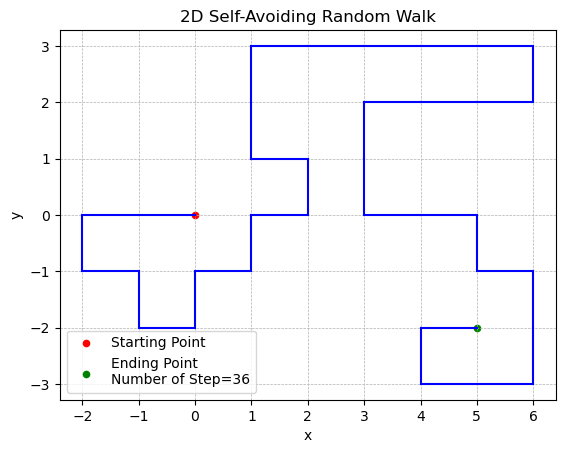

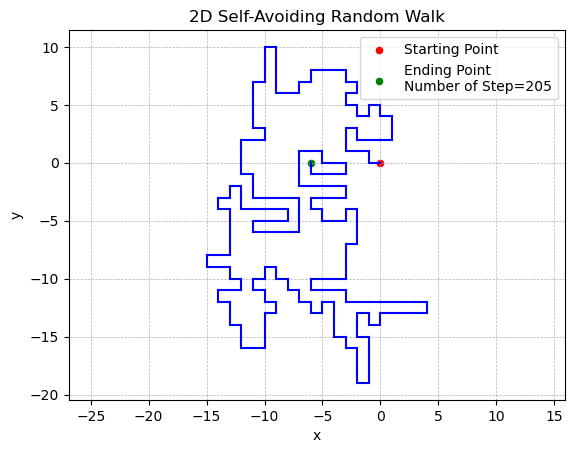

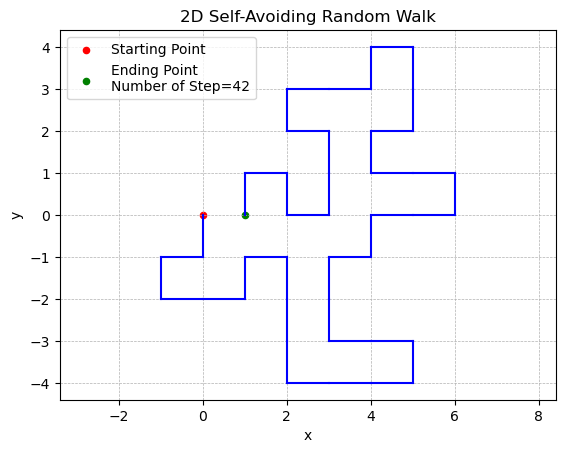

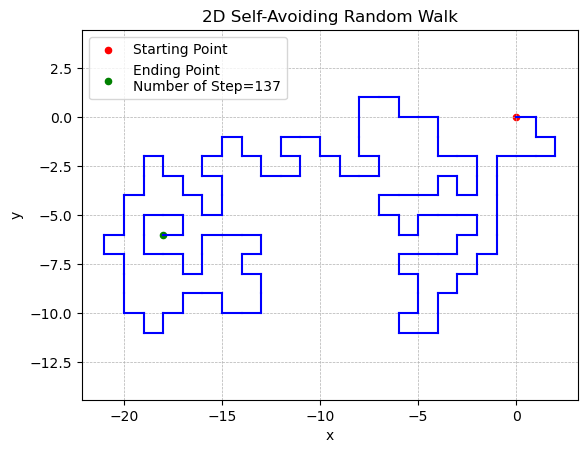

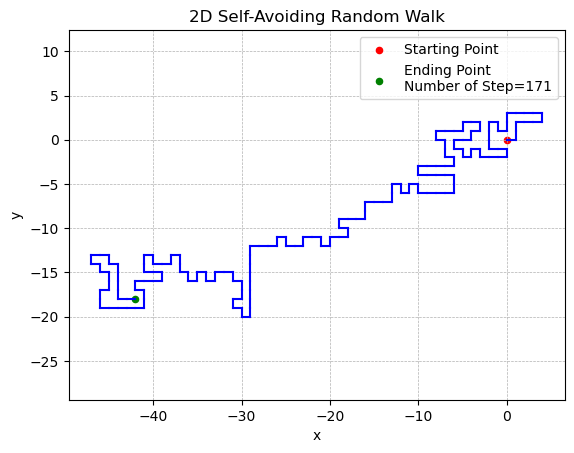

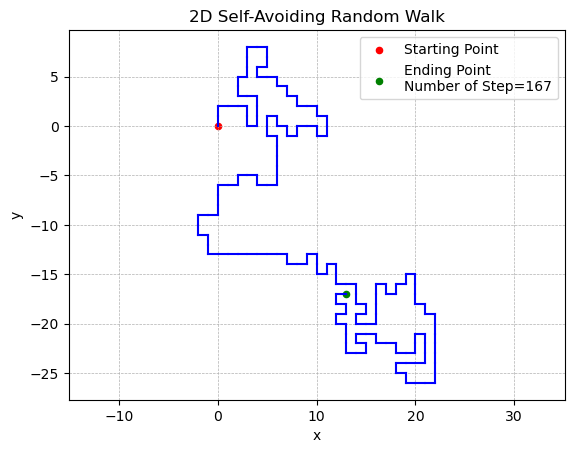

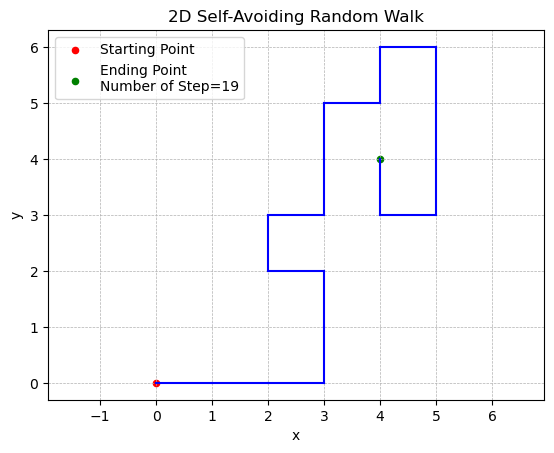

In [175]:
for i in range(10):
    selfavoidingwalk2d(10000000)

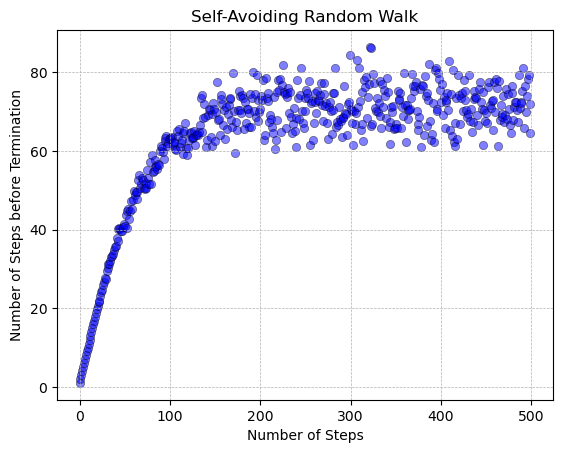

In [11]:
d_mean=[]
for i in np.arange(0, 500):
    steps=[]
    d=[]
    for j in range(100):
        s, x, y=selfavoidingwalk2d(i, plot=False)
        steps.append(s)
        d.append(np.sqrt(x**2 + y**2))
    d_mean.append(stat.mean(d))
    plt.scatter(i, stat.mean(steps), alpha=0.5, edgecolors='black', linewidths=0.5, color='blue')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Number of Steps')
plt.ylabel('Number of Steps before Termination')
plt.title('Self-Avoiding Random Walk')
plt.show()

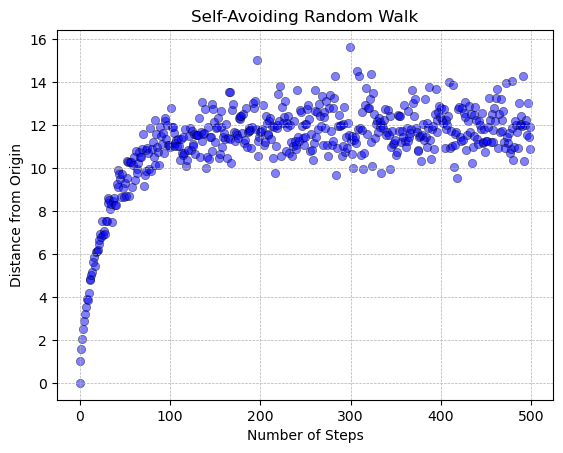

In [14]:
plt.scatter(np.arange(0, 500), d_mean, alpha=0.5, edgecolors='black', linewidths=0.5, color='blue')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Number of Steps')
plt.ylabel('Distance from Origin')
plt.title('Self-Avoiding Random Walk')
plt.show()

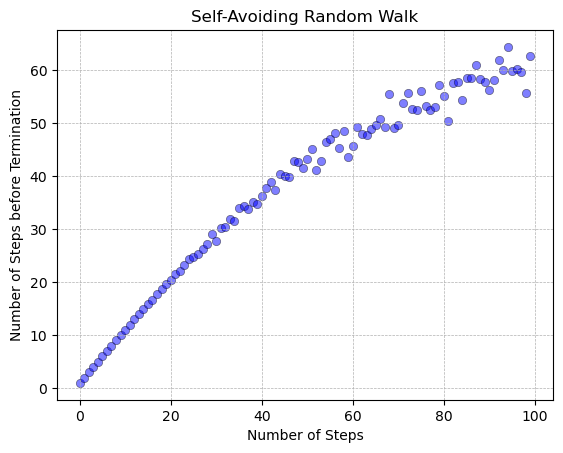

In [23]:
d_mean=[]
for i in np.arange(0, 100):
    steps=[]
    d=[]
    for j in range(100):
        s, x, y=selfavoidingwalk2d(i, plot=False)
        steps.append(s)
        d.append(x**2 + y**2)
    d_mean.append(stat.mean(d))
    plt.scatter(i, stat.mean(steps), alpha=0.5, edgecolors='black', linewidths=0.5, color='blue')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Number of Steps')
plt.ylabel('Number of Steps before Termination')
plt.title('Self-Avoiding Random Walk')
plt.show()

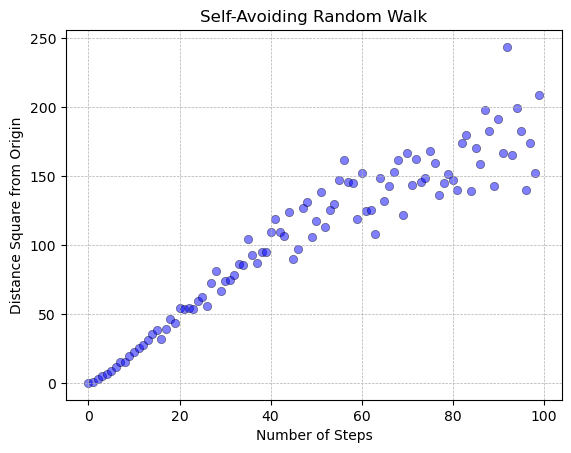

In [26]:
plt.scatter(np.arange(0, 100), d_mean, alpha=0.5, edgecolors='black', linewidths=0.5, color='blue')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Number of Steps')
plt.ylabel('Distance Square from Origin')
plt.title('Self-Avoiding Random Walk')
plt.show()

## Self avoiding walk in higher dimension

### 2D

In [195]:
def self_avoiding_2d(steps, walkers):
    # Initialize positions and paths for all walkers
    x_walkers = [np.zeros(walkers)]
    y_walkers = [np.zeros(walkers)]
    d_sq_stdev = []
    
    # Store full path history for each walker (for self-avoidance)
    paths = [[(0, 0)] for _ in range(walkers)]
    
    # Track which walkers are still active (not trapped)
    active = np.ones(walkers, dtype=bool)  # All walkers start active
    
    for i in range(steps):
        x_current = x_walkers[-1].copy()
        y_current = y_walkers[-1].copy()
        
        # If no walkers are left active, break early
        if not np.any(active):
            break
        
        for j in range(walkers):
            x, y = paths[j][-1]  # Current position of walker j
            
            if not active[j]:  # Skip if walker is already trapped
                x_current[j] = x
                y_current[j] = y
                continue
            
            
            # Check available directions (0=right, 1=left, 2=up, 3=down)
            possible_dirs = []
            if (x + 1, y) not in paths[j]:  # Right
                possible_dirs.append(0)
            if (x - 1, y) not in paths[j]:   # Left
                possible_dirs.append(1)
            if (x, y + 1) not in paths[j]:  # Up
                possible_dirs.append(2)
            if (x, y - 1) not in paths[j]:  # Down
                possible_dirs.append(3)
            
            if not possible_dirs:  # No moves left → mark as trapped
                active[j] = False
                continue  # Skip to next walker
            
            dir = random.choice(possible_dirs)
            if dir == 0:
                x = x + 1
            elif dir == 1:
                x = x - 1
            elif dir == 2:
                y = y + 1
            else:
                y = y - 1
            
            paths[j].append((x, y))  # Update path
            x_current[j] = x
            y_current[j] = y
        
        x_walkers.append(x_current)
        y_walkers.append(y_current)
        
        d_sq = x_current**2 + y_current**2
        d_sq_stdev.append(stat.stdev(d_sq))
    
    return d_sq_stdev

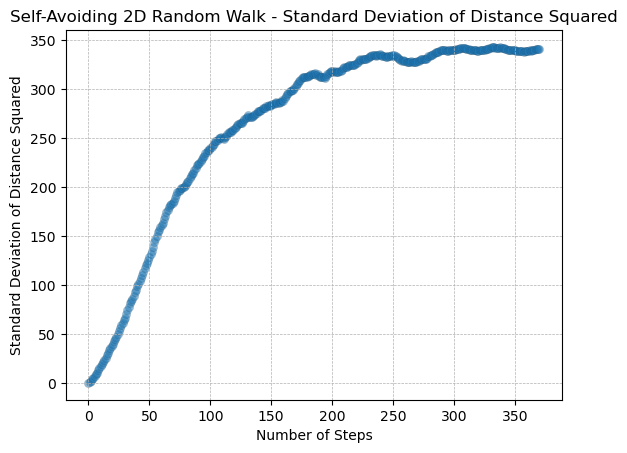

In [196]:
steps = 10000
walkers = 1000
d_sq_stdev_2d = self_avoiding_2d(steps, walkers)
plt.scatter(np.arange(len(d_sq_stdev_2d)), d_sq_stdev_2d, alpha=0.5, edgecolor='black', linewidths=0.1)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Number of Steps')
plt.ylabel('Standard Deviation of Distance Squared')
plt.title('Self-Avoiding 2D Random Walk - Standard Deviation of Distance Squared')
plt.show()

### 3D

In [197]:
def self_avoiding_3d(steps, walkers):
    # Initialize positions (x, y, z) for all walkers
    x_walkers = [np.zeros(walkers)]
    y_walkers = [np.zeros(walkers)]
    z_walkers = [np.zeros(walkers)]
    d_sq_stdev = []  # Standard deviation of squared distances
    
    # Store full path history for each walker (for self-avoidance)
    paths = [[(0, 0, 0)] for _ in range(walkers)]
    
    # Track which walkers are still active (not trapped)
    active = np.ones(walkers, dtype=bool)  # All walkers start active
    
    for i in range(steps):
        x_current = x_walkers[-1].copy()
        y_current = y_walkers[-1].copy()
        z_current = z_walkers[-1].copy()
        
        # If no walkers are left active, break early
        if not np.any(active):
            break
        
        for j in range(walkers):
            x, y, z = paths[j][-1]  # Current position of walker j
            
            if not active[j]:  # Skip if walker is already trapped
                x_current[j] = x
                y_current[j] = y
                z_current[j] = z
                continue
            
            # Check available directions (6 possible moves in 3D)
            possible_dirs = []
            if (x + 1, y, z) not in paths[j]:  # +x
                possible_dirs.append(0)
            if (x - 1, y, z) not in paths[j]:   # -x
                possible_dirs.append(1)
            if (x, y + 1, z) not in paths[j]:  # +y
                possible_dirs.append(2)
            if (x, y - 1, z) not in paths[j]:  # -y
                possible_dirs.append(3)
            if (x, y, z + 1) not in paths[j]:  # +z
                possible_dirs.append(4)
            if (x, y, z - 1) not in paths[j]:  # -z
                possible_dirs.append(5)
            
            if not possible_dirs:  # No moves left → mark as trapped
                active[j] = False
                continue  # Skip to next walker
            
            dir = random.choice(possible_dirs)
            if dir == 0:
                x += 1
            elif dir == 1:
                x -= 1
            elif dir == 2:
                y += 1
            elif dir == 3:
                y -= 1
            elif dir == 4:
                z += 1
            else:
                z -= 1
            
            paths[j].append((x, y, z))  # Update path
            x_current[j] = x
            y_current[j] = y
            z_current[j] = z
        
        x_walkers.append(x_current)
        y_walkers.append(y_current)
        z_walkers.append(z_current)
        
        d_sq = x_current**2 + y_current**2 + z_current**2
        d_sq_stdev.append(stat.stdev(d_sq))
    
    return d_sq_stdev

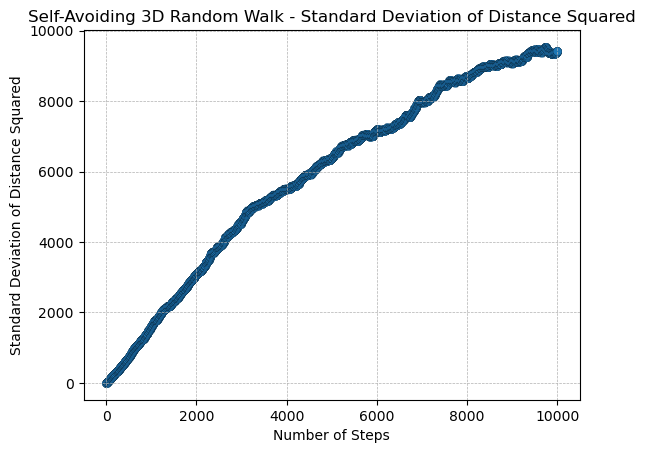

In [199]:
steps = 10000
walkers = 1000
d_sq_stdev = self_avoiding_3d(steps, walkers)
plt.scatter(np.arange(len(d_sq_stdev)), d_sq_stdev, alpha=0.5, edgecolor='black', linewidths=0.1)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Number of Steps')
plt.ylabel('Standard Deviation of Distance Squared')
plt.title('Self-Avoiding 3D Random Walk - Standard Deviation of Distance Squared')
plt.show()

### 4D

In [200]:
def self_avoiding_4d(steps, walkers):
    # Initialize positions (x, y, z, u) for all walkers
    x_walkers = [np.zeros(walkers)]
    y_walkers = [np.zeros(walkers)]
    z_walkers = [np.zeros(walkers)]
    u_walkers = [np.zeros(walkers)]
    d_sq_stdev = []  # Standard deviation of squared distances
    
    # Store full path history for each walker (for self-avoidance)
    paths = [[(0, 0, 0, 0)] for _ in range(walkers)]
    
    # Track which walkers are still active (not trapped)
    active = np.ones(walkers, dtype=bool)  # All walkers start active
    
    for i in range(steps):
        x_current = x_walkers[-1].copy()
        y_current = y_walkers[-1].copy()
        z_current = z_walkers[-1].copy()
        u_current = u_walkers[-1].copy()
        
        # If no walkers are left active, break early
        if not np.any(active):
            break
        
        for j in range(walkers):
            x, y, z, u = paths[j][-1]  # Current position of walker j
            
            if not active[j]:  # Skip if walker is already trapped
                x_current[j] = x
                y_current[j] = y
                z_current[j] = z
                u_current[j] = u
                continue
            
            # Check available directions (6 possible moves in 3D)
            possible_dirs = []
            if (x + 1, y, z, u) not in paths[j]:  # +x
                possible_dirs.append(0)
            if (x - 1, y, z, u) not in paths[j]:   # -x
                possible_dirs.append(1)
            if (x, y + 1, z, u) not in paths[j]:  # +y
                possible_dirs.append(2)
            if (x, y - 1, z, u) not in paths[j]:  # -y
                possible_dirs.append(3)
            if (x, y, z + 1, u) not in paths[j]:  # +z
                possible_dirs.append(4)
            if (x, y, z - 1, u) not in paths[j]:  # -z
                possible_dirs.append(5)
            if (x, y, z, u + 1) not in paths[j]:  # +u
                possible_dirs.append(6)
            if (x, y, z, u - 1) not in paths[j]:  # -u
                possible_dirs.append(7)
            
            if not possible_dirs:  # No moves left → mark as trapped
                active[j] = False
                continue  # Skip to next walker
            
            dir = random.choice(possible_dirs)
            if dir == 0:
                x += 1
            elif dir == 1:
                x -= 1
            elif dir == 2:
                y += 1
            elif dir == 3:
                y -= 1
            elif dir == 4:
                z += 1
            elif dir == 5:
                z -= 1
            elif dir == 6:
                u += 1
            else:
                u -= 1
            
            paths[j].append((x, y, z, u))  # Update path
            x_current[j] = x
            y_current[j] = y
            z_current[j] = z
            u_current[j] = u
        
        x_walkers.append(x_current)
        y_walkers.append(y_current)
        z_walkers.append(z_current)
        u_walkers.append(u_current)
        
        d_sq = x_current**2 + y_current**2 + z_current**2 + u_current**2
        d_sq_stdev.append(stat.stdev(d_sq))
    
    return d_sq_stdev

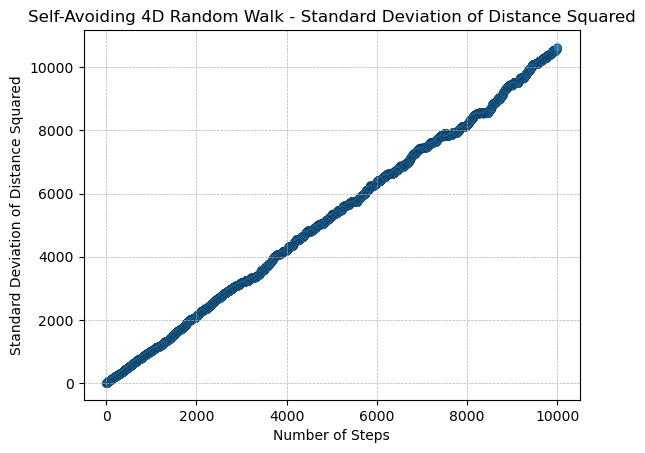

In [203]:
steps = 10000
walkers = 1000
d_sq_stdev_4d = self_avoiding_4d(steps, walkers)
plt.scatter(np.arange(len(d_sq_stdev_4d)), d_sq_stdev_4d, alpha=0.5, edgecolor='black', linewidths=0.1)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Number of Steps')
plt.ylabel('Standard Deviation of Distance Squared')
plt.title('Self-Avoiding 4D Random Walk - Standard Deviation of Distance Squared')
plt.show()

### It ran for freaking 259m 29.3s